# POC of Network visualization

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../semantic_mapping'))
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import circlify
import semantic_similarity

from sklearn.cluster import AffinityPropagation



# Computing similarity matrix
dataset_name = 'fictional_chars'
#semantic_similarity.build_similarity_matrix(dataset_name)

# Load similarity matrix

sim_matrix = np.loadtxt("similarity_matrices/{0}.txt".format(dataset_name))
lst_names = semantic_similarity.load_names(dataset_name)

display(sim_matrix)
display(lst_names)


array([[1.        , 0.80687351, 0.28834204, 0.28834204, 0.59713033,
        0.53356025],
       [0.80687351, 1.        , 0.28834204, 0.28834204, 0.50566167,
        0.59224592],
       [0.28834204, 0.28834204, 1.        , 0.31670559, 0.42810435,
        0.32441524],
       [0.28834204, 0.28834204, 0.31670559, 1.        , 0.33517101,
        0.32441524],
       [0.59713033, 0.50566167, 0.42810435, 0.33517101, 1.        ,
        0.53593382],
       [0.53356025, 0.59224592, 0.32441524, 0.32441524, 0.53593382,
        1.        ]])

['Cersei_Lannister',
 'Jaime_Lannister',
 'Petyr_Baelish',
 'Tywin_Lannister',
 'Joffrey_Baratheon',
 'Brienne_of_Tarth']

In [2]:
# Compute clusters using Affinity Propagation algorithm
clustering = AffinityPropagation(random_state=10, max_iter=800).fit(sim_matrix)
display(clustering.labels_)
display(clustering.cluster_centers_indices_)

array([0, 0, 1, 2, 0, 0])

array([0, 2, 3])

In [3]:
# Create semantic maps using the exemplars as centers
exemplars_dict = {}
av_size = 0
for i in range(0, len(clustering.labels_)):
    if clustering.labels_[i] not in exemplars_dict.keys():
        exemplars_dict[clustering.labels_[i]] = []
    exemplars_dict[clustering.labels_[i]].append(i)
    
# Create circles_dict for cicrle packing
circle_lst = []

for k,v in exemplars_dict.items():
    exemplar_indx = semantic_similarity.find_exemplar(clustering.cluster_centers_indices_, v)
    children_list = []
    av_size += len(v)
    for item in v:
        children_list.append({'id': ' ', 'datum': 1})
    circle_item = dict()
    circle_item['id'] = lst_names[exemplar_indx]
    circle_item['datum'] = len(v)
    circle_item['children'] = children_list
    circle_lst.append(circle_item)

av_size = av_size / len(circle_lst)

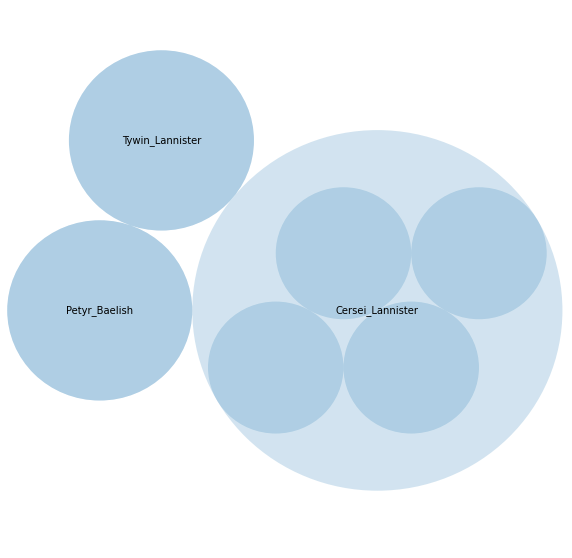

In [4]:
# compute circle positions:
circles = circlify.circlify(
    circle_lst, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)


# print circles
for circle in circles:
    if not circle:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )